In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/covid_19_clean_complete (4).csv")

In [3]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [4]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
#Renaming the columns

df.rename(columns={"Date":"date",
                   "Province/State":"state",
                   "Country/Region":"country",
                   "Lat":"lat",
                   "Long":"long",
                   "Confirmed":"confirmed",
                   "Deaths":"deaths",
                   "Recovered":"recovered",
                   "Active":"active",
                   "WHO Region":"WHO"},inplace=True)

In [7]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [8]:
df['active'].sum()


396715350

In [9]:
top=df[df["date"]=="2020-07-27"]
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [10]:
world=top.groupby("country").sum()[["confirmed","deaths","recovered","active"]].reset_index()
world

,country,confirmed,deaths,recovered,active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [15]:
fig=px.choropleth(world,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,15000],color_continuous_scale="Reds",title='Countries with Active cases')
fig.show()
# px.choropleth: This function from Plotly Express is used to create a choropleth map.

In [14]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="deaths",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="blues",
                       title="Countries with Death Cases")
figure.show()

In [16]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="recovered",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="Greens",
                       title="Countries with Recovered Cases")
figure.show()

In [17]:
# Analyse the Trends in the active,deaths, confirmed and recovered case

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

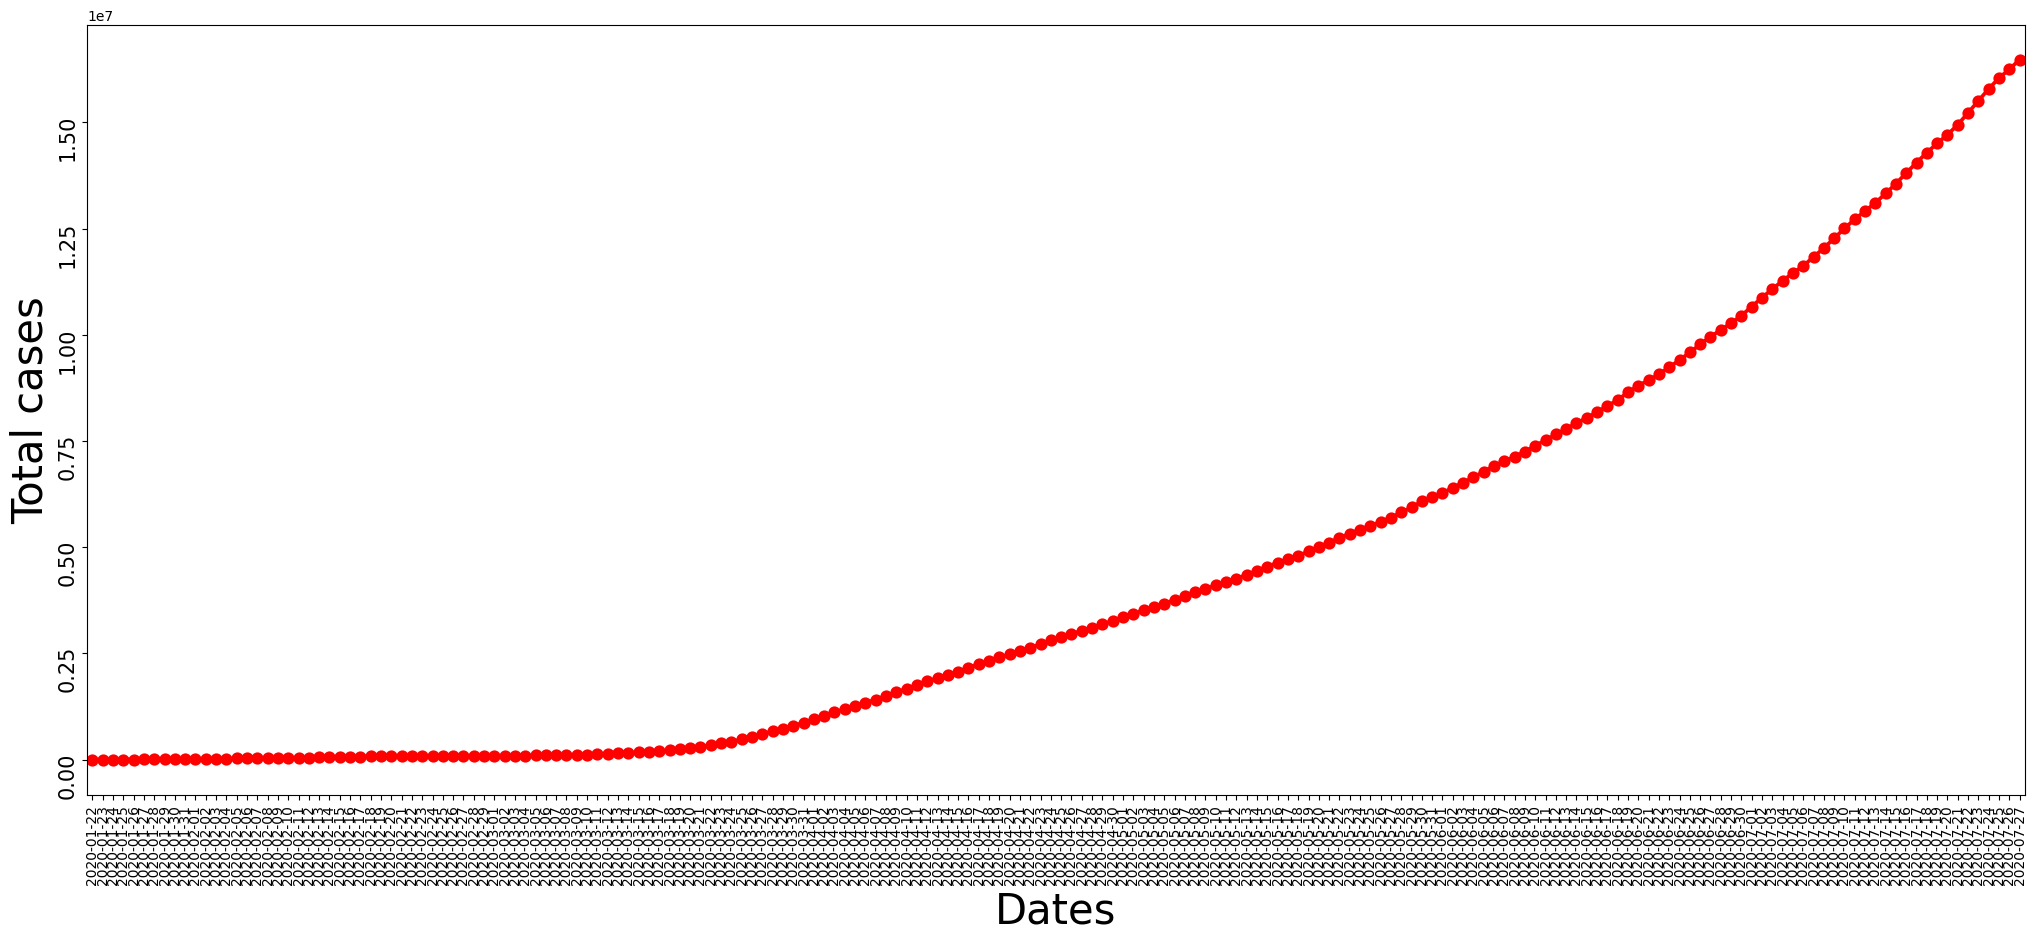

In [18]:
# # TREND OF HOW COVID SPREAD
plt.figure(figsize=(25,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.yticks(rotation = 90)
# plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
total_cases = df.groupby("date")['date','confirmed'].sum().reset_index()
total_cases

ax = sns.pointplot(x=total_cases.date, y=total_cases.confirmed, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

In [19]:
total_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


Top 20 countries having most death cases

In [20]:
top_deaths =df.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()
top_deaths

,country,deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

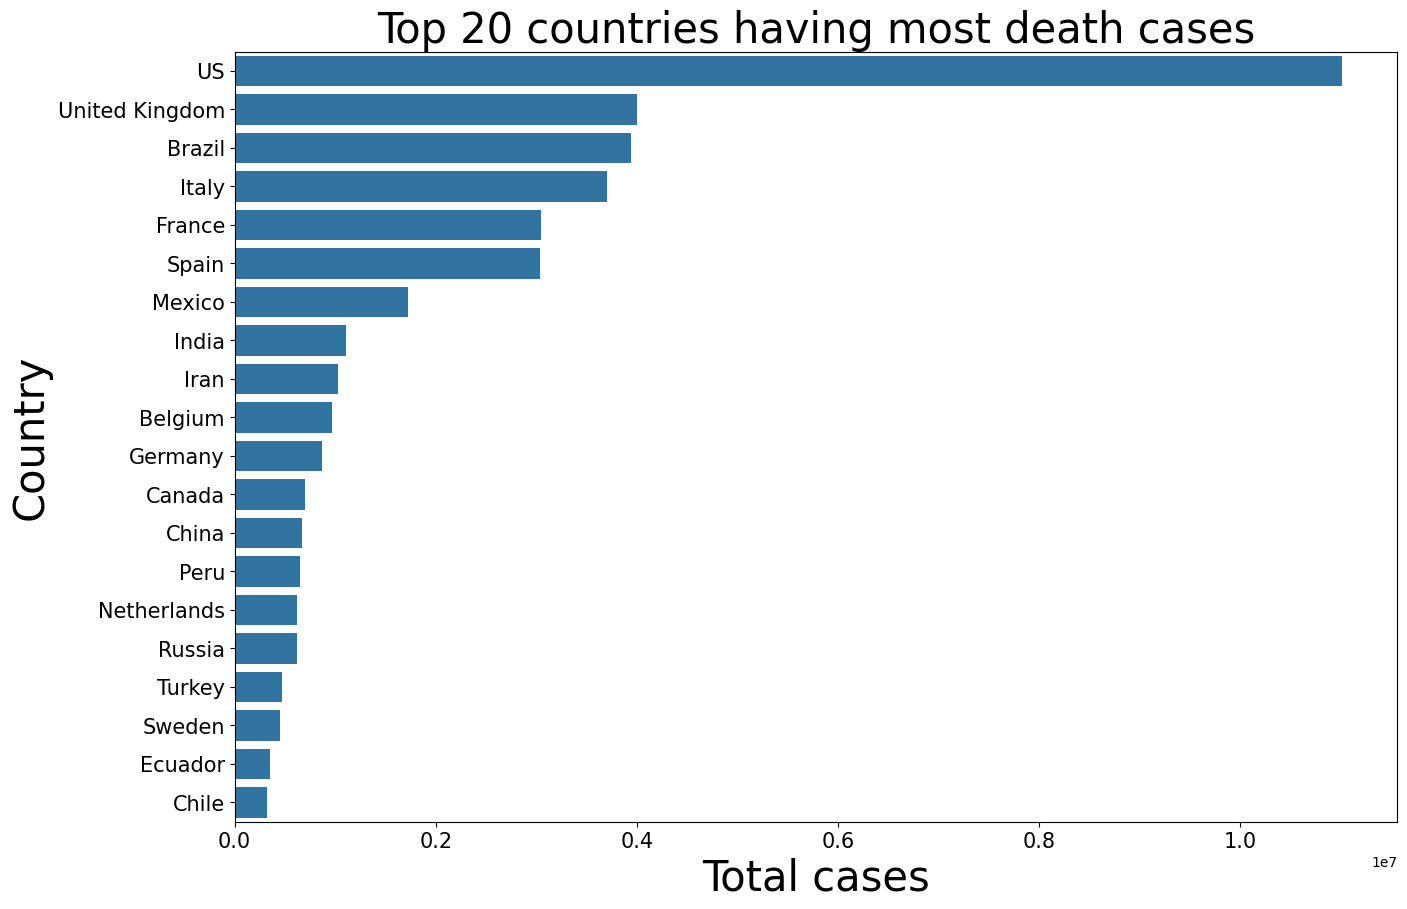

In [21]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most death cases",fontsize=30)
ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)
ax.set(xlabel="Total cases",ylabel="Country")

top 20 Countries with highest active cases

In [22]:
top_actives =df.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

,country,active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

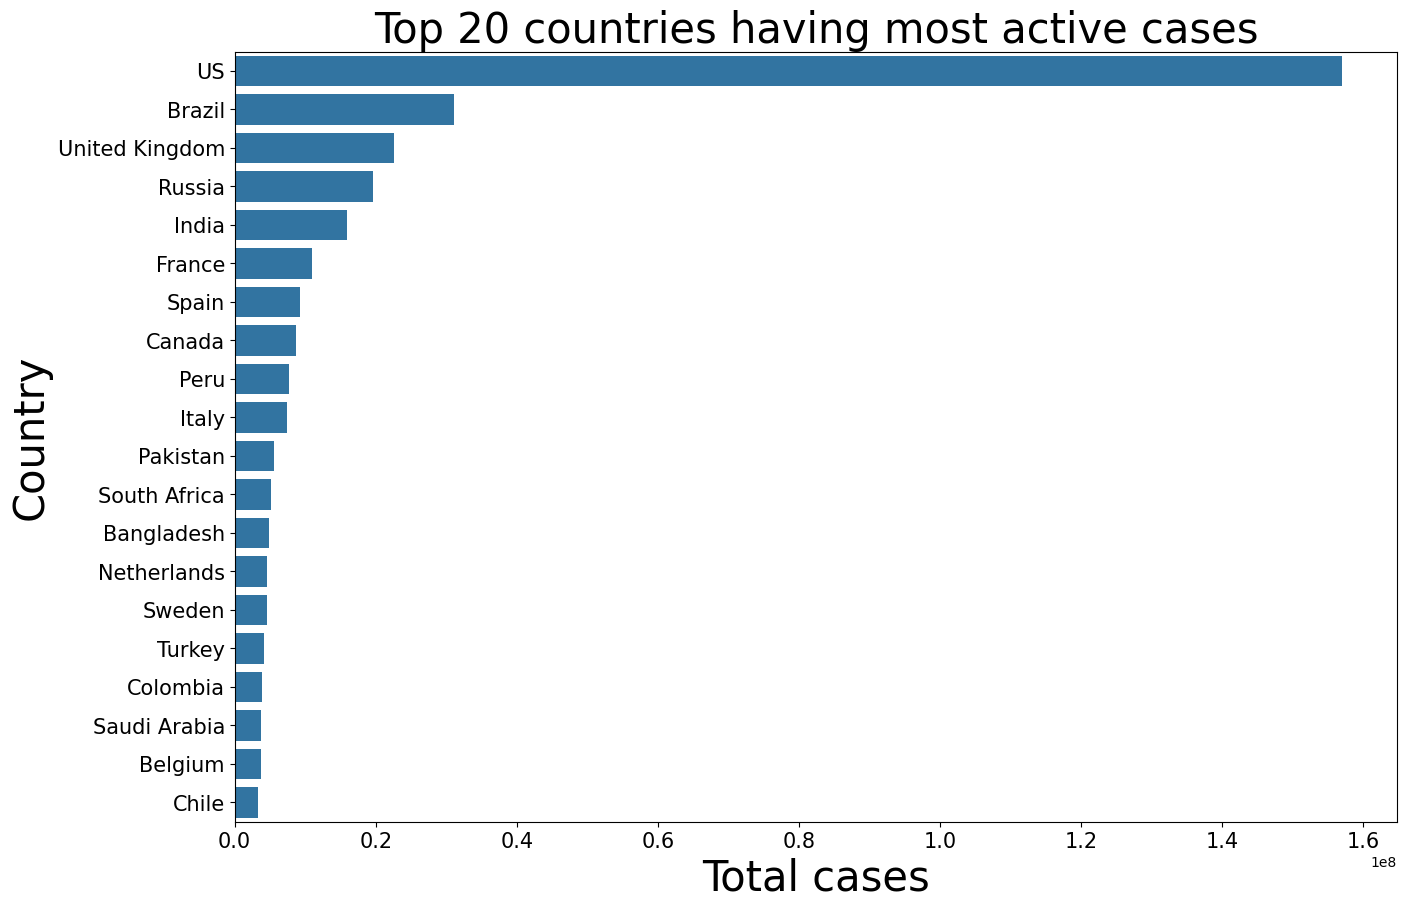

In [23]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active, y=top_actives.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [24]:
top_confirmed =df.groupby(by="country")["confirmed"].sum().sort_values(ascending=False).head(20).reset_index()
top_confirmed

,country,confirmed
0,US,224345948
1,Brazil,89524967
2,Russia,45408411
3,India,40883464
4,Spain,27404045
5,United Kingdom,26748587
6,Italy,26745145
7,France,21210926
8,Germany,21059152
9,Iran,19339267


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

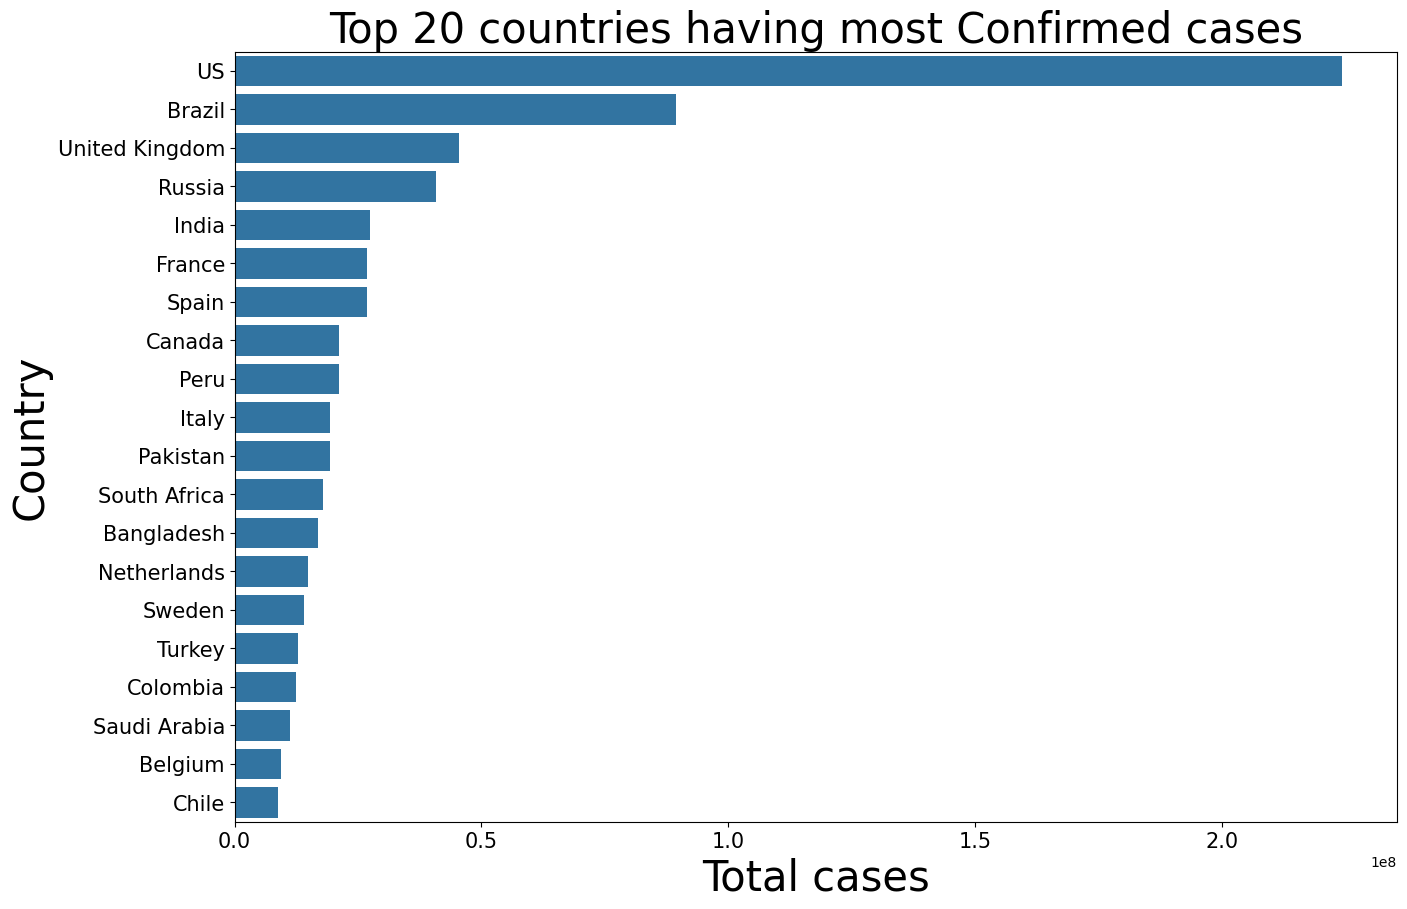

In [25]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most Confirmed cases",fontsize=30)
ax = sns.barplot(x=top_confirmed.confirmed, y=top_actives.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [ ]:
# Top 5 countries having highest active cases are :
#     US
#     Brazil
#     UK
#     Russia
#     India

In [26]:
Brazil = df[df.country=="Brazil"]
Brazil = Brazil.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()

In [27]:
Brazil

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1620313,84082,2287475,583080
184,2020-07-24,1693214,85238,2343366,564914
185,2020-07-25,1785359,86449,2394513,522705
186,2020-07-26,1812913,87004,2419091,519174


In [28]:
US = df[df.country=="US"]
US = US.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()

In [29]:
US

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5
...,...,...,...,...,...
183,2020-07-23,1233269,144430,4038816,2661117
184,2020-07-24,1261624,145560,4112531,2705347
185,2020-07-25,1279414,146465,4178970,2753091
186,2020-07-26,1297863,146935,4233923,2789125


In [30]:
Russia =df[df.country=="Russia"]
Russia = Russia.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()

In [31]:
Russia

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,579295,12873,793720,201552
184,2020-07-24,587728,13026,799499,198745
185,2020-07-25,596064,13172,805332,196096
186,2020-07-26,599172,13249,811073,198652


In [32]:
India= df[df.country=="India"]
India = India.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()


In [33]:
India

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,817209,30601,1288108,440298
184,2020-07-24,849432,31358,1337024,456234
185,2020-07-25,885573,32060,1385635,468002
186,2020-07-26,917568,32771,1435616,485277


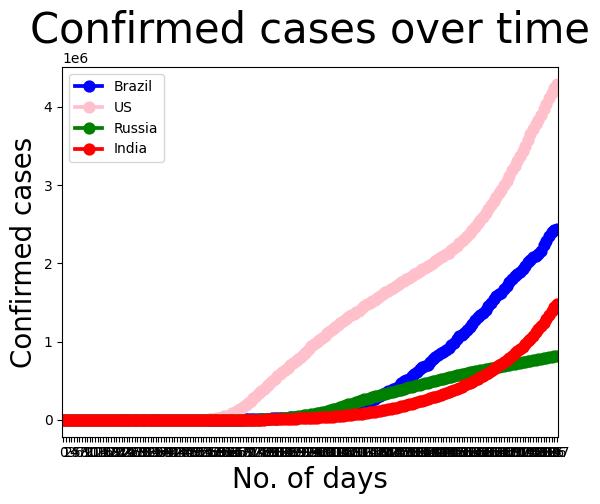

In [34]:
sns.pointplot(data=Brazil, x=Brazil.index, y='confirmed', color="Blue", label="Brazil")
sns.pointplot(data=US, x=US.index, y='confirmed', color="Pink", label="US")
sns.pointplot(data=Russia, x=Russia.index, y='confirmed', color="Green", label="Russia")
sns.pointplot(data=India, x=India.index, y='confirmed', color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Confirmed cases', fontsize=20)
plt.title('Confirmed cases over time', fontsize=30)

# Adding a legend to distinguish the countries
plt.legend()

plt.show()

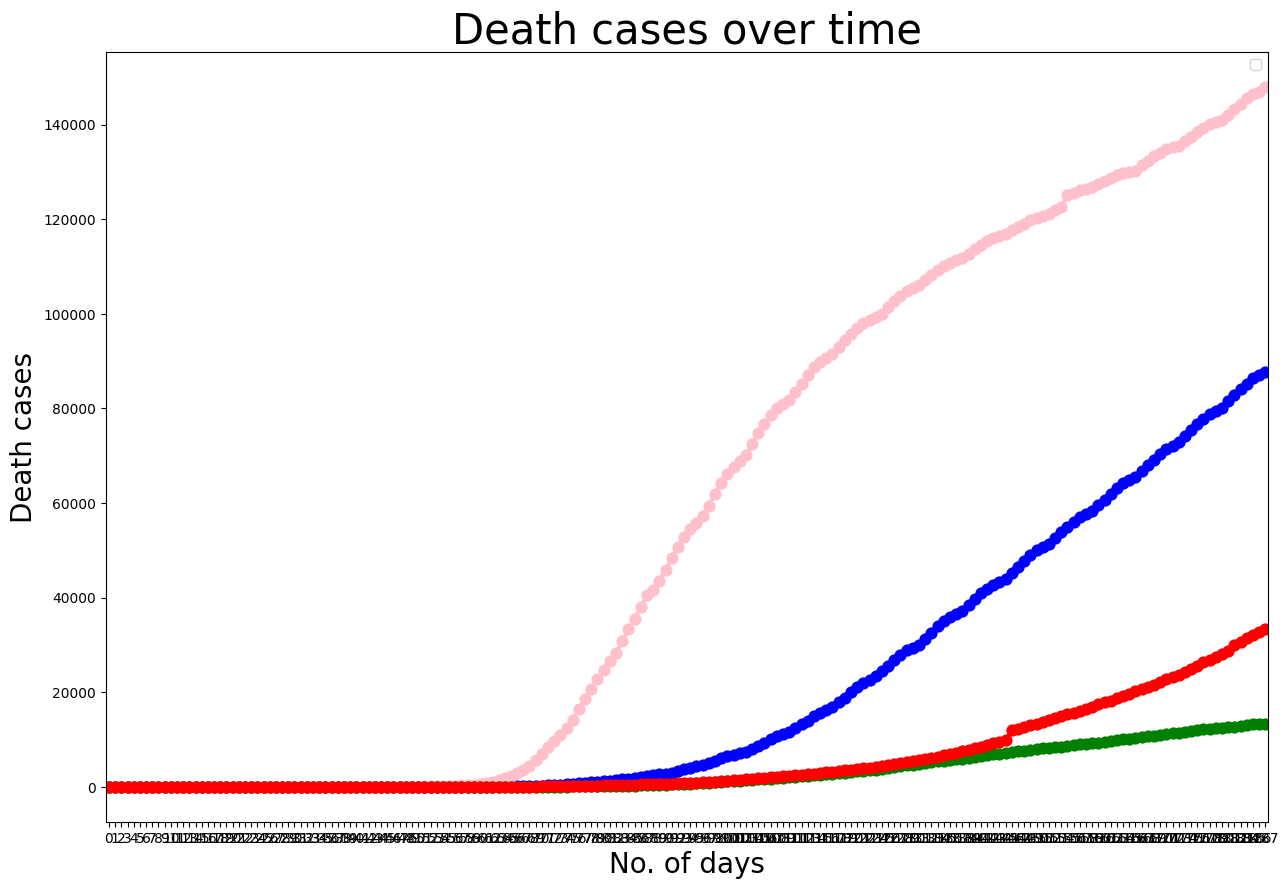

In [35]:
plt.figure(figsize=(15, 10))

# Plotting the data for each country
sns.pointplot(x=Brazil.index, y=Brazil.deaths, color="Blue")
sns.pointplot(x=US.index, y=US.deaths, color="Pink")
sns.pointplot(x=Russia.index, y=Russia.deaths, color="Green")
sns.pointplot(x=India.index, y=India.deaths, color="Red")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Death cases', fontsize=20)
plt.title('Death cases over time', fontsize=30)
# Adding a legend to distinguish the countries
plt.legend()
plt.show()

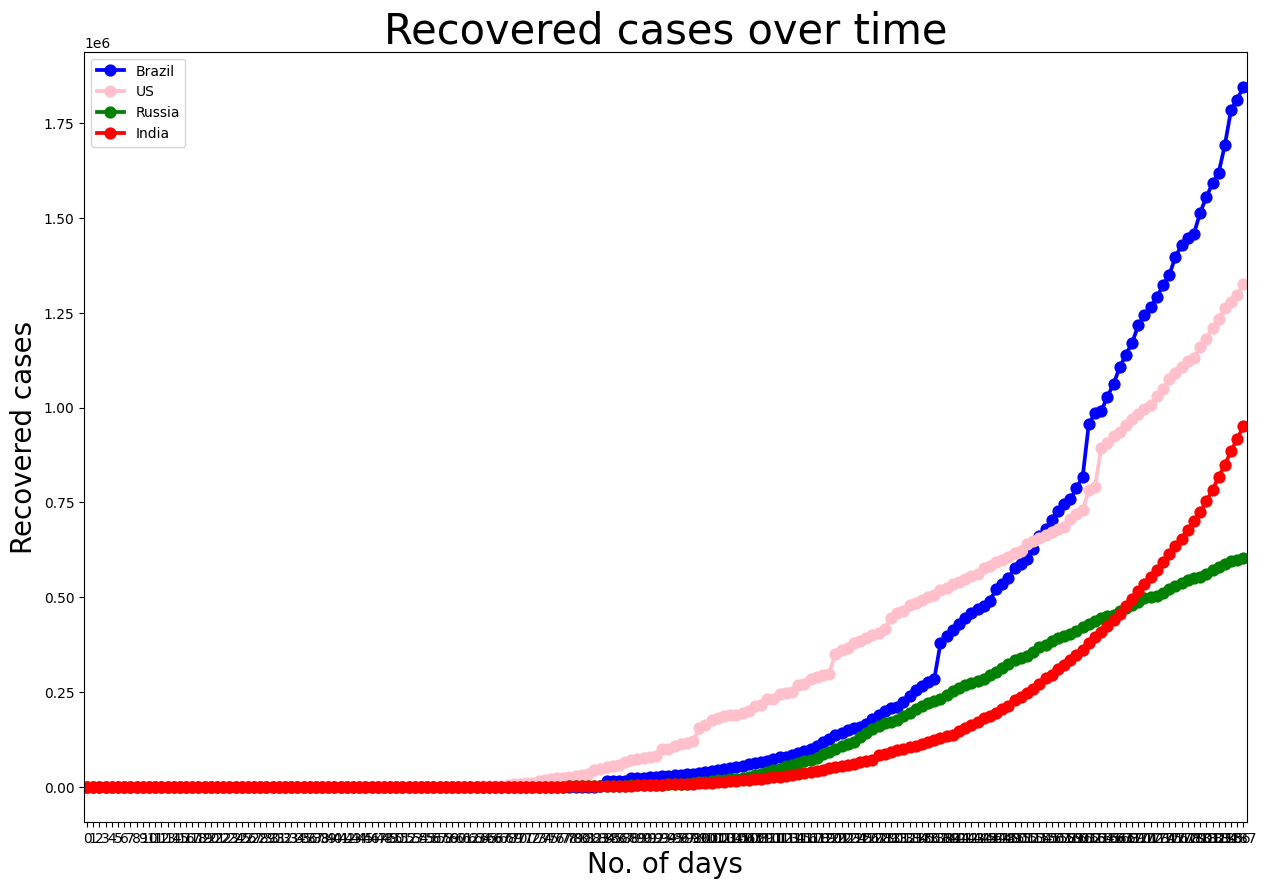

In [36]:
plt.figure(figsize=(15, 10))

# Plotting the data for each country
sns.pointplot(x=Brazil.index, y=Brazil.recovered, color="Blue", label="Brazil")
sns.pointplot(x=US.index, y=US.recovered, color="Pink", label="US")
sns.pointplot(x=Russia.index, y=Russia.recovered, color="Green", label="Russia")
sns.pointplot(x=India.index, y=India.recovered, color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Recovered cases', fontsize=20)
plt.title('Recovered cases over time', fontsize=30)

# Adding a legend to distinguish the countries
plt.legend()

plt.show()

**FORECASTING USING FBPROPHET**

In [37]:
# # # FB Prophet

# # Prophet is a forecasting tool open-sourced by Facebook that is designed for creating accurate time-series forecasts.
# It's widely used for its simplicity and ability to handle various time-series data types with customizable features.
# Whether it's daily observations, irregular intervals, or seasonality, Prophet can often adapt well.

In [38]:
!pip install prophet

In [39]:
from prophet import Prophet

In [40]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      14664 non-null  object 
 1   country    49068 non-null  object 
 2   lat        49068 non-null  float64
 3   long       49068 non-null  float64
 4   date       49068 non-null  object 
 5   confirmed  49068 non-null  int64  
 6   deaths     49068 non-null  int64  
 7   recovered  49068 non-null  int64  
 8   active     49068 non-null  int64  
 9   WHO        49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [42]:
df["date"]=pd.to_datetime(df["date"])

In [43]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   state      14664 non-null  object        
 1   country    49068 non-null  object        
 2   lat        49068 non-null  float64       
 3   long       49068 non-null  float64       
 4   date       49068 non-null  datetime64[ns]
 5   confirmed  49068 non-null  int64         
 6   deaths     49068 non-null  int64         
 7   recovered  49068 non-null  int64         
 8   active     49068 non-null  int64         
 9   WHO        49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [45]:
confirmed=df.groupby("date").sum()["confirmed"].reset_index()
confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [46]:
deaths=df.groupby("date").sum()["deaths"].reset_index()
deaths

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [47]:
recovered=df.groupby("date").sum()["recovered"].reset_index()
recovered

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [48]:
active=df.groupby("date").sum()["active"].reset_index()
active

,date,active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


Forecasting for the confirmed cases

In [49]:
# For building a forecasting model using fbProphet library,
# there should be only 2 columns passed
# The column names should always be --> 'ds','y'

In [50]:
confirmed.rename(columns={"date":"ds","confirmed":"y"},inplace=True)

In [51]:
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [52]:
con_model=Prophet(interval_width=0.95)

In [53]:
# Training of Model (fitting the data to the model)
con_model.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgw6dnq8g/rlvei_qe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgw6dnq8g/jc0vp6y2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33240', 'data', 'file=/tmp/tmpgw6dnq8g/rlvei_qe.json', 'init=/tmp/tmpgw6dnq8g/jc0vp6y2.json', 'output', 'file=/tmp/tmpgw6dnq8g/prophet_model41ubo9ct/prophet_model-20240319155203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:52:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:52:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [54]:
future=con_model.make_future_dataframe(periods=7)

In [55]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [56]:
forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632020e+07,1.615955e+07,1.648718e+07
189,2020-07-29,1.652997e+07,1.636883e+07,1.669123e+07
190,2020-07-30,1.674391e+07,1.658736e+07,1.690763e+07
191,2020-07-31,1.695910e+07,1.679760e+07,1.714473e+07
192,2020-08-01,1.716676e+07,1.700183e+07,1.733795e+07
193,2020-08-02,1.736430e+07,1.718557e+07,1.754044e+07
194,2020-08-03,1.755889e+07,1.737865e+07,1.773884e+07


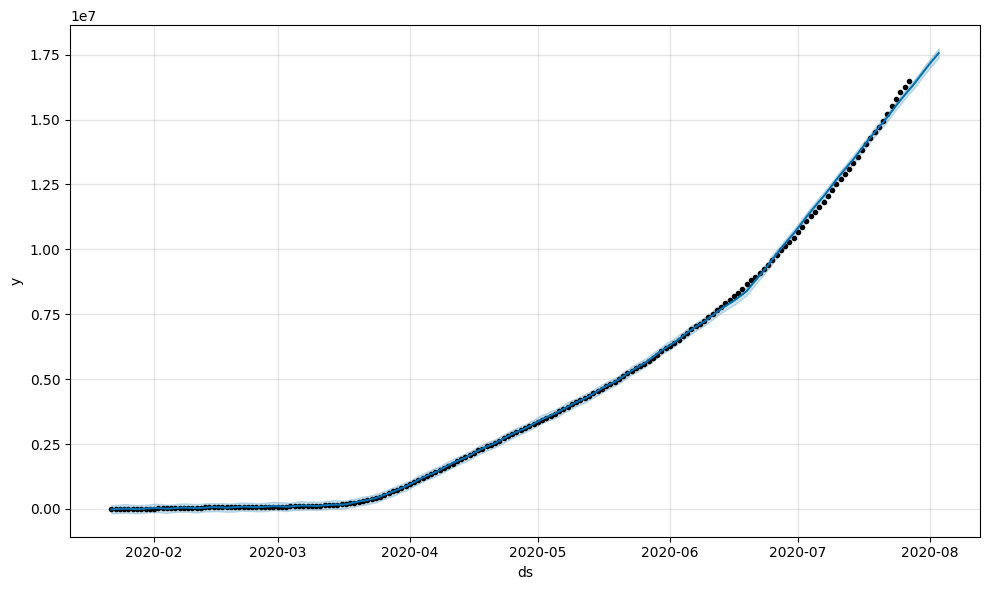

In [57]:
confirmed_plot=con_model.plot(forecast)

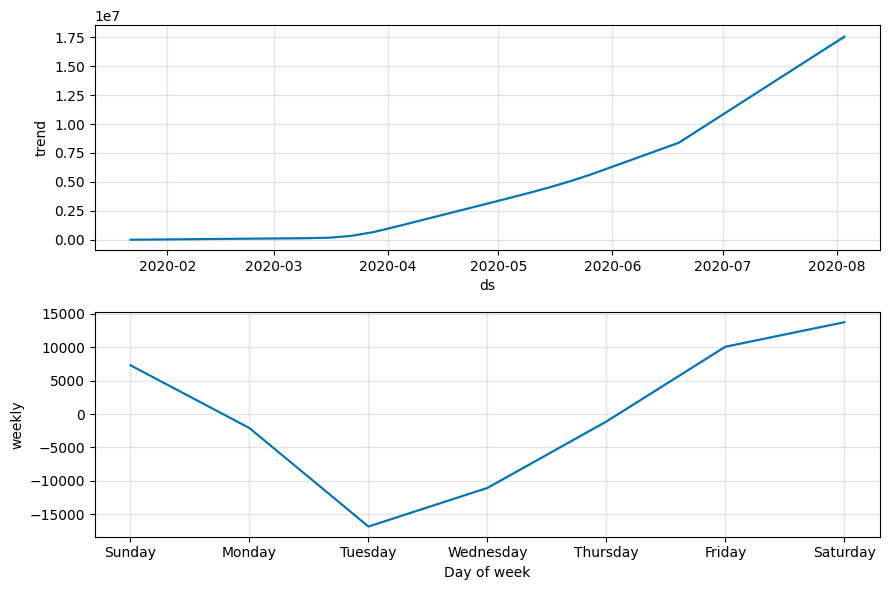

In [58]:
confirmed_forecast_plot1 = con_model.plot_components(forecast)

FORECAST ON DEATH CASES:

In [59]:
deaths

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [60]:
deaths.rename(columns={"date":"ds","deaths":"y"},inplace=True)

In [61]:
deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [62]:
death_model=Prophet(interval_width=0.95)

In [63]:
# Training of Model (fiting thr data to the model)
death_model.fit(deaths)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgw6dnq8g/2mxdb9sg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgw6dnq8g/3ljcqs33.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5907', 'data', 'file=/tmp/tmpgw6dnq8g/2mxdb9sg.json', 'init=/tmp/tmpgw6dnq8g/3ljcqs33.json', 'output', 'file=/tmp/tmpgw6dnq8g/prophet_modelbbtr19qc/prophet_model-20240319161741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:17:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:17:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [64]:
future=death_model.make_future_dataframe(periods=7)

In [65]:
forecast=death_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,652315.566446,649292.128350,655161.832941
189,2020-07-29,657882.129102,655060.047282,661042.580893
190,2020-07-30,663491.395651,660228.797481,666725.552135
191,2020-07-31,669006.394312,665611.595063,672269.167904
192,2020-08-01,673888.426957,669881.124950,677725.459727
193,2020-08-02,678025.345020,673360.284471,682305.749891
194,2020-08-03,682315.659400,676836.221212,687969.770483


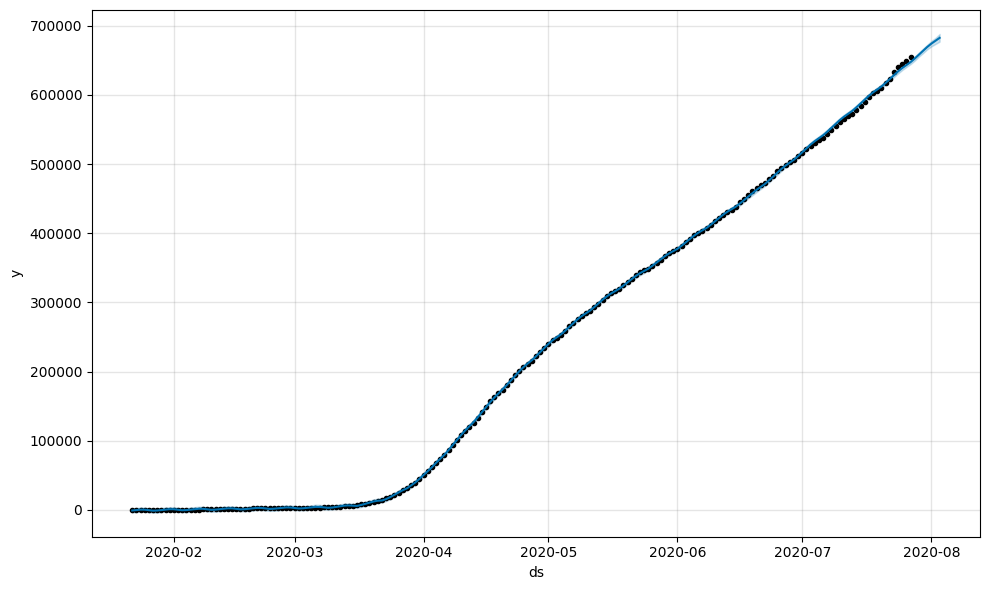

In [66]:
death_plot=death_model.plot(forecast)

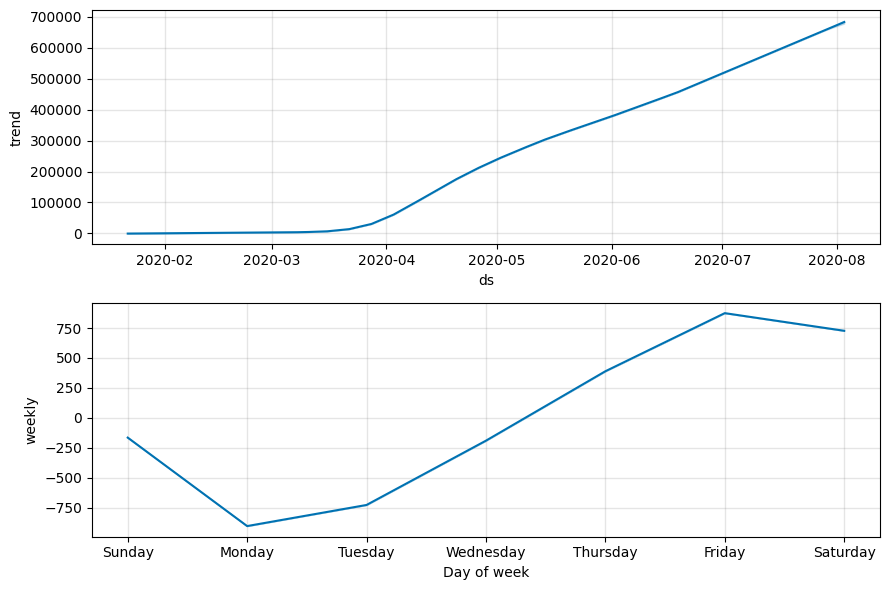

In [67]:
death_forecast_plot1 = death_model.plot_components(forecast)

FORECAST ON RECOVERED CASES:

In [68]:
recovered

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [69]:
recovered.rename(columns={"date":"ds","recovered":"y"},inplace=True)

In [70]:
recovered

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [71]:
recovery_model=Prophet(interval_width=0.95)

In [72]:
recovery_model.fit(recovered)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgw6dnq8g/be1i906k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgw6dnq8g/4b7wekmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74006', 'data', 'file=/tmp/tmpgw6dnq8g/be1i906k.json', 'init=/tmp/tmpgw6dnq8g/4b7wekmu.json', 'output', 'file=/tmp/tmpgw6dnq8g/prophet_model4_937jay/prophet_model-20240319162956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:29:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:29:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [73]:
future=recovery_model.make_future_dataframe(periods=7)

In [74]:
forecast=recovery_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,9.311028e+06,9.188918e+06,9.430370e+06
189,2020-07-29,9.453130e+06,9.322800e+06,9.569862e+06
190,2020-07-30,9.595783e+06,9.469060e+06,9.714503e+06
191,2020-07-31,9.737182e+06,9.604562e+06,9.860899e+06
192,2020-08-01,9.877343e+06,9.755159e+06,9.999513e+06
193,2020-08-02,1.000332e+07,9.865789e+06,1.012902e+07
194,2020-08-03,1.013982e+07,1.001878e+07,1.028693e+07


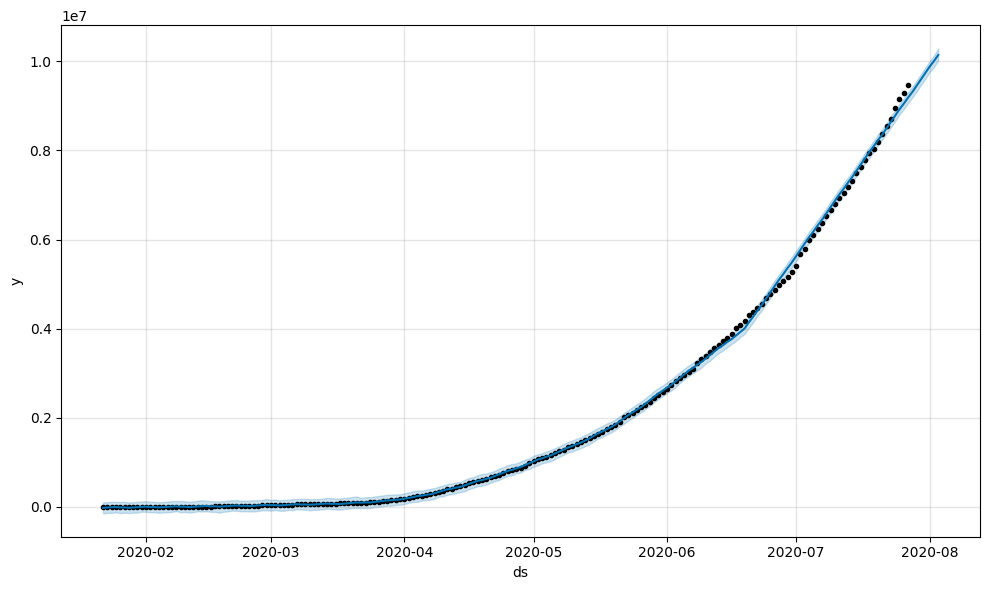

In [75]:
recover_plot=recovery_model.plot(forecast)

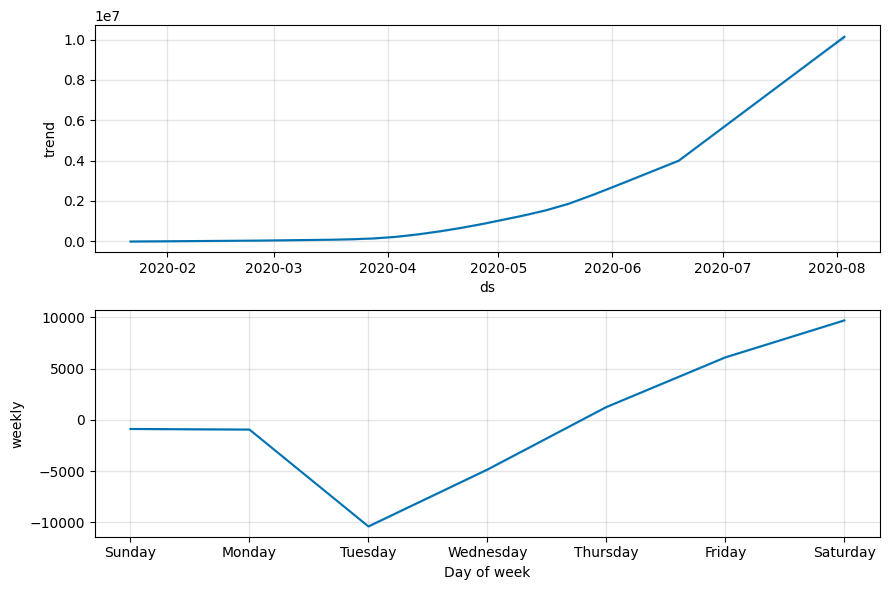

In [76]:
recover_plot=recovery_model.plot_components(forecast)

FORECAST FOR ACTIVE CASES:

In [77]:
active

,date,active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [78]:
active.rename(columns={"date":"ds","active":"y"},inplace=True)

In [79]:
active

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [80]:
active_model=Prophet(interval_width=0.95)

In [81]:
active_model.fit(active)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgw6dnq8g/x83r62af.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgw6dnq8g/rd8_qp3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70348', 'data', 'file=/tmp/tmpgw6dnq8g/x83r62af.json', 'init=/tmp/tmpgw6dnq8g/rd8_qp3v.json', 'output', 'file=/tmp/tmpgw6dnq8g/prophet_modele4z4dp35/prophet_model-20240319164045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:40:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:40:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [82]:
future=active_model.make_future_dataframe(periods=7)

In [83]:
forecast=active_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,6.353415e+06,6.285831e+06,6.420095e+06
189,2020-07-29,6.415815e+06,6.344042e+06,6.487840e+06
190,2020-07-30,6.481274e+06,6.411505e+06,6.551656e+06
191,2020-07-31,6.549315e+06,6.482478e+06,6.617393e+06
192,2020-08-01,6.611480e+06,6.534366e+06,6.685268e+06
193,2020-08-02,6.678771e+06,6.606358e+06,6.755926e+06
194,2020-08-03,6.732521e+06,6.651923e+06,6.805198e+06


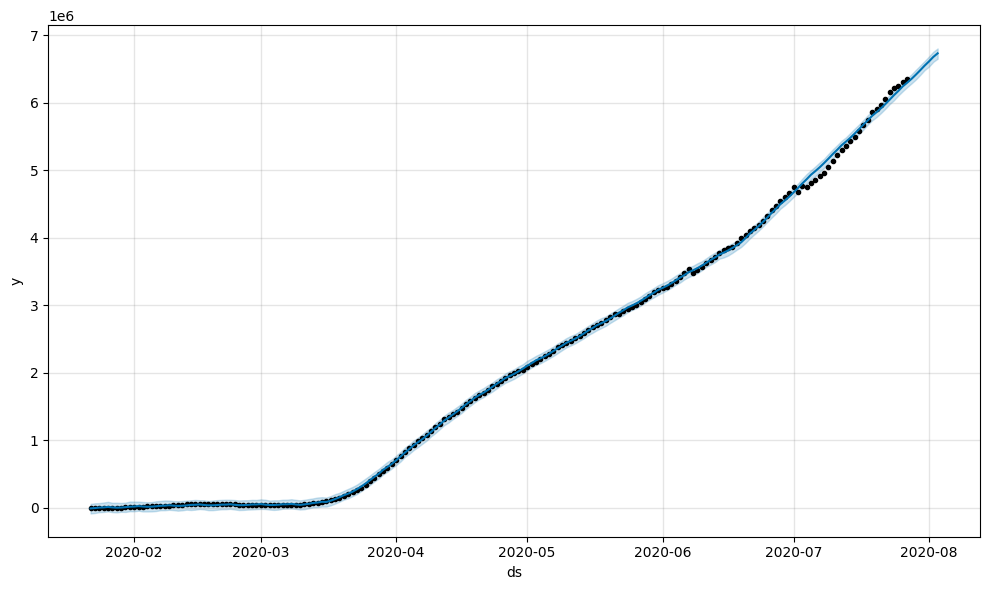

In [84]:
active_plot=active_model.plot(forecast)

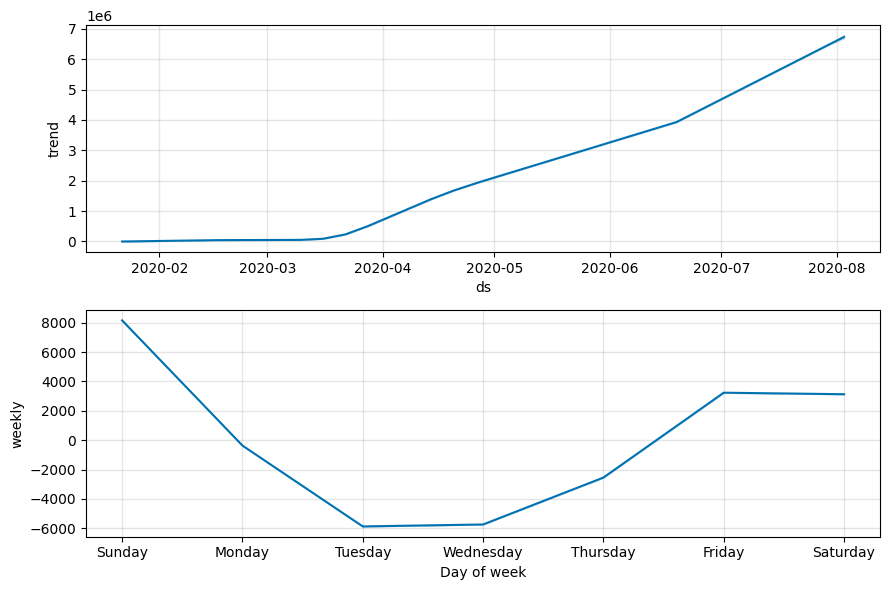

In [85]:
active_plot=active_model.plot_components(forecast)